# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [ ]:
# TODO: RA & Name
print('210184: ' + 'Alan Edward da Silva Oliveira')

## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

# AC1

## Importações

In [110]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


## Funções

In [114]:
def replace_null_values(data):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            data[column] = data[column].fillna(data[column].mean())
    return data

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "MSE": mse, "R²": r2}

Importar datasets

In [115]:
dataset_train = pd.read_csv('datasets/data-train - train.csv')
dataset_test = pd.read_csv('datasets/data-test - test.csv')

## Análise Exploratória

### Treino

Cinco Primeiras Linhas

In [84]:
dataset_train.head(n=5)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,...,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,...,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,...,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,...,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,...,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7


Distribuição das Classes

In [40]:
dataset_train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,...,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,...,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,...,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,...,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,...,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,...,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


Verificar valores nulos

In [61]:
dataset_train.isnull().sum()

avganncount                   0
avgdeathsperyear              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2056
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          138
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     551
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

Verificar valores NaN

In [60]:
dataset_train.isna().sum()

avganncount                   0
avgdeathsperyear              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2056
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          138
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     551
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

Histogramas

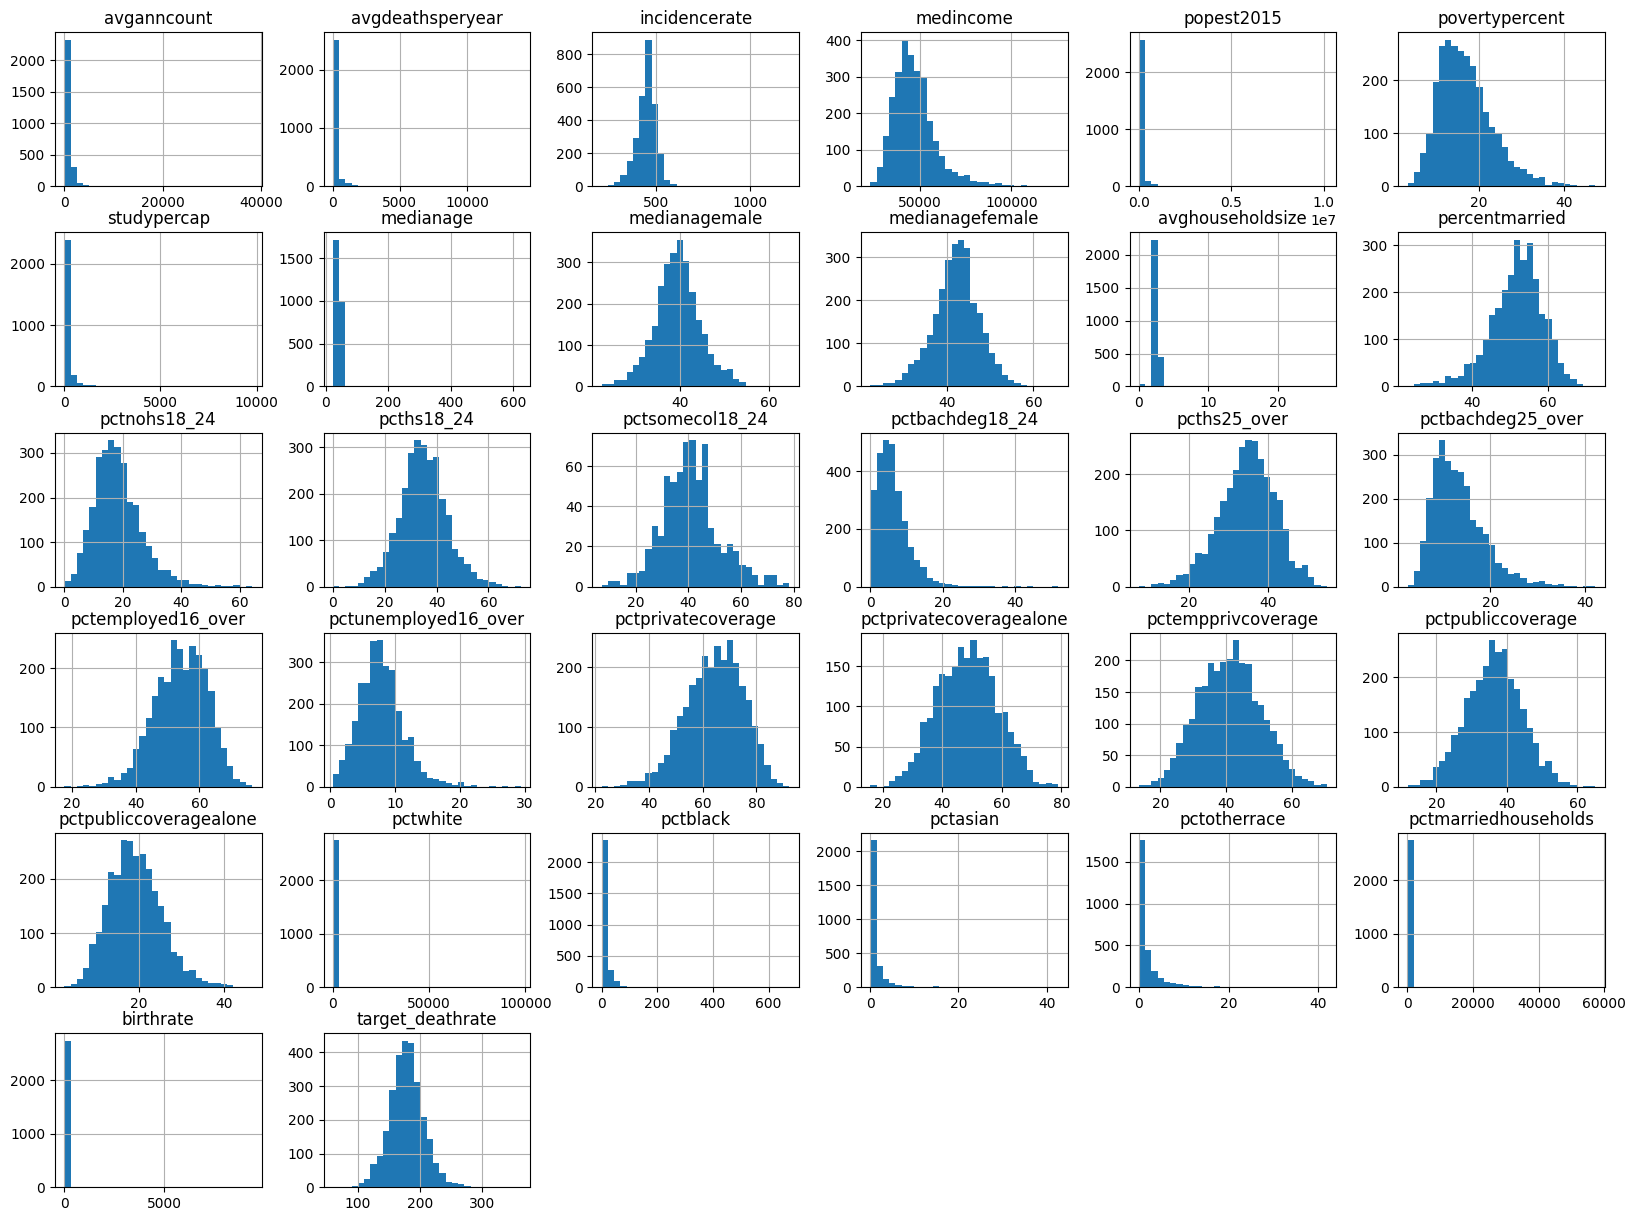

In [43]:
dataset_train.hist(bins=30, figsize=(20,15))
plt.show()

Tipos de Dados

In [44]:
dataset_train.dtypes

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

### Teste

Cinco Primeiras Linhas

In [33]:
dataset_test.head(n=5)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,37.0,15,423.8,54556,5619,10.1,0.000000,"(54545.6, 61494.5]",47.5,46.2,...,44.2,31.9,12.7,97.191504,0.912761,0.017553,1.000527,53.409091,6.001847,150.3
1,1337.0,550,459.6,46388,268441,17.2,972.280687,"(45201, 48021.6]",36.5,35.3,...,50.0,30.2,17.1,79.528599,12.921428,2.013126,2.037074,46.380079,5.453791,180.3
2,436.0,160,438.7,51629,83632,11.9,0.000000,"(51046.4, 54545.6]",40.9,39.7,...,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837,154.4
3,387.0,149,413.9,53953,70601,12.0,84.984632,"(51046.4, 54545.6]",45.1,43.8,...,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754,153.9
4,167.0,75,460.6,42374,28491,17.5,35.098803,"(40362.7, 42724.4]",42.6,42.1,...,42.5,39.7,21.6,97.423394,0.819672,0.335478,0.103756,53.903574,5.314640,205.9


Distribuição das Classes

In [31]:
dataset_train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,...,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,...,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,...,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,...,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,...,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,...,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


## Limpeza dos Dados

Remover colunas desnecessárias

In [116]:
columns_to_remove = [
    'binnedinc', # Já temos medianIncome, então essa versão agrupada não é necessária
    'medianagemale', 'medianagefemale', # Temos a MedianAge, então essas colunas não são necessárias
    'geography', # Não impacta na mortalidade
    'avgdeathsperyear', # Inbutido na target_deathrate
    'avganncount', # Refletido em incidenceRate
]

dataset_train = dataset_train.drop(columns=columns_to_remove)
dataset_test = dataset_test.drop(columns=columns_to_remove)

Remover valores nulos

In [117]:
dataset_train = replace_null_values(dataset_train)
dataset_test = replace_null_values(dataset_test)

Identificar correlações com a variável alvo

In [118]:
correlations = dataset_train.corr()["target_deathrate"].sort_values(ascending=False)

correlations

target_deathrate           1.000000
incidencerate              0.459844
pctpubliccoveragealone     0.451681
povertypercent             0.432146
pcths25_over               0.416191
pctpubliccoverage          0.415156
pctunemployed16_over       0.370567
pcths18_24                 0.258339
pctblack                   0.212680
pctnohs18_24               0.084285
pctwhite                   0.014102
medianage                  0.011176
avghouseholdsize          -0.000752
studypercap               -0.021208
birthrate                 -0.025958
pctmarriedhouseholds      -0.029088
pctsomecol18_24           -0.080473
popest2015                -0.116688
pctotherrace              -0.192890
pctasian                  -0.198644
percentmarried            -0.264329
pctempprivcoverage        -0.273845
pctbachdeg18_24           -0.294621
pctprivatecoveragealone   -0.333008
pctprivatecoverage        -0.385310
pctemployed16_over        -0.405168
medincome                 -0.437025
pctbachdeg25_over         -0

Remover valores que possuem correlação baixa com a variável alvo

In [119]:
low_correlation_columns = correlations[abs(correlations) <= 0.2].index

dataset_train = dataset_train.drop(columns=low_correlation_columns)
dataset_test = dataset_test.drop(columns=low_correlation_columns)

## Treinar modelo

In [120]:
X_train = dataset_train.drop(columns=["target_deathrate"])
y_train = dataset_train["target_deathrate"]

X_test = dataset_test.drop(columns=["target_deathrate"], errors="ignore")

In [121]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

In [123]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_regressor.predict(X_test_scaled)

In [130]:
results_linear = evaluate_model(linear_reg, X_train_scaled, y_train)
results_sgd = evaluate_model(sgd_regressor, X_train_scaled, y_train)

print(results_linear)
print(results_sgd)

{'MAE': 14.607556917908282, 'MSE': 380.58080150885854, 'R²': 0.505175062759714}
{'MAE': 14.623344787627328, 'MSE': 381.099387716137, 'R²': 0.504500805449695}


(None, None)

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




*Coloque sua resposta aqui ...*

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [ ]:
# seu codigo

In [ ]:
# Linear Model with SDGRegressor


In [ ]:
# Polynomial model with SDGRegressor


## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.